# Download the Dataset

In [1]:
!wget https://philharmonia-assets.s3-eu-west-1.amazonaws.com/uploads/2020/02/12112005/all-samples.zip

--2020-06-19 17:42:11--  https://philharmonia-assets.s3-eu-west-1.amazonaws.com/uploads/2020/02/12112005/all-samples.zip
Resolving philharmonia-assets.s3-eu-west-1.amazonaws.com (philharmonia-assets.s3-eu-west-1.amazonaws.com)... 52.218.105.155
Connecting to philharmonia-assets.s3-eu-west-1.amazonaws.com (philharmonia-assets.s3-eu-west-1.amazonaws.com)|52.218.105.155|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 260849422 (249M) [application/zip]
Saving to: ‘all-samples.zip’

all-samples.zip     100%[===================>] 248.76M  30.4MB/s    in 8.9s    

2020-06-19 17:42:20 (28.1 MB/s) - ‘all-samples.zip’ saved [260849422/260849422]



# Extract zip files

In [2]:
from zipfile import ZipFile
with ZipFile('all-samples.zip', 'r') as zipObj:
   # Extract all the contents of zip file in current directory
   zipObj.extractall()

In [3]:
import os
dir_path='./all-samples'

In [4]:
for path, dir_list, file_list in os.walk(dir_path):
    for file_name in file_list:
        if file_name.endswith(".zip"):
            abs_file_path = os.path.join(path, file_name)

            parent_path = os.path.split(abs_file_path)[0]
            output_folder_name = os.path.splitext(abs_file_path)[0]
            output_path = os.path.join(parent_path, output_folder_name)

            zip_obj = ZipFile(abs_file_path, 'r')
            zip_obj.extractall(output_path)
            zip_obj.close()

# Start Trials

In [5]:
path_dataset='./all-samples/all-samples/'
import fnmatch
import librosa
import sys

In [6]:
instruments = ['banjo','bass-clarinet','bassoon', 'cello','clarinet','contrabassoon',
               'english-horn','double-bass','flute','french-horn','guitar','mandolin',
               'oboe','percussion','saxophone','trombone','trumpet','tuba','viola','violin']
classes = []
durations = []
files_error = []

counter=1
for root, dirnames, filenames in os.walk(path_dataset):
    for filename in filenames:
      print ("Get %d = %s"%(counter, filename))
      try:
        y, sr = librosa.load(os.path.join(root, filename), sr=None)
        durations.append(librosa.get_duration(y=y, sr=sr))
        if 'percussion' in root:
          classes.append('percussion')
        else:
          for instrument in instruments:
            if fnmatch.fnmatchcase(filename, instrument+'*'):
              classes.append(instrument)
      except Exception as e:
            files_error.append({'file':os.path.join(root, filename),'error':sys.exc_info()})
            print("Error loading %s. Error: %s" % (filename,e))
      counter+=1


Streaming output truncated to the last 5000 lines.
Get 8685 = bass-clarinet_D4_025_pianissimo_normal.mp3
Get 8686 = bass-clarinet_G2_phrase_mezzo-forte_staccato.mp3
Get 8687 = bass-clarinet_G2_025_piano_normal.mp3
Get 8688 = bass-clarinet_F3_1_mezzo-forte_normal.mp3
Get 8689 = bass-clarinet_Ds5_05_piano_normal.mp3
Get 8690 = bass-clarinet_G2_1_pianissimo_normal.mp3
Get 8691 = bass-clarinet_Ds5_05_pianissimo_normal.mp3
Get 8692 = bass-clarinet_Cs3_1_fortissimo_normal.mp3
Get 8693 = bass-clarinet_As2_025_pianissimo_normal.mp3
Get 8694 = bass-clarinet_G2_1_mezzo-forte_normal.mp3
Get 8695 = bass-clarinet_Gs5_025_fortissimo_normal.mp3
Get 8696 = bass-clarinet_E5_05_mezzo-forte_normal.mp3
Get 8697 = bass-clarinet_C5_025_mezzo-forte_normal.mp3
Get 8698 = bass-clarinet_Fs5_15_mezzo-forte_normal.mp3
Get 8699 = bass-clarinet_E5_1_mezzo-forte_normal.mp3
Get 8700 = bass-clarinet_A3_15_pianissimo_normal.mp3
Get 8701 = bass-clarinet_G3_15_pianissimo_normal.mp3
Get 8702 = bass-clarinet_Fs2_025_piano_

In [7]:
import pandas as pd
ds_Classes = pd.Series(classes)
ds_Classes.value_counts()

violin           1502
viola             973
tuba              972
bass-clarinet     944
cello             889
flute             878
double-bass       852
clarinet          846
trombone          831
saxophone         732
bassoon           720
contrabassoon     710
english-horn      691
french-horn       652
oboe              596
trumpet           485
percussion        148
guitar            106
mandolin           80
banjo              74
dtype: int64

The cells below is just to show you a way to learn and understand how to get information about the errors.

In [8]:
print(files_error)

[{'file': './all-samples/all-samples/saxophone/saxophone_Fs3_15_fortissimo_normal.mp3', 'error': (<class 'EOFError'>, EOFError(), <traceback object at 0x7f3cd1928f08>)}, {'file': './all-samples/all-samples/viola/viola_D6_05_piano_arco-normal.mp3', 'error': (<class 'EOFError'>, EOFError(), <traceback object at 0x7f3cd1928688>)}]


In [9]:
import traceback
traceback.print_exception(files_error[0]['error'][0],files_error[0]['error'][1],files_error[0]['error'][2])

Traceback (most recent call last):
  File "<ipython-input-6-b1e5e337a43f>", line 13, in <module>
    y, sr = librosa.load(os.path.join(root, filename), sr=None)
  File "/usr/local/lib/python3.6/dist-packages/librosa/core/audio.py", line 119, in load
    with audioread.audio_open(os.path.realpath(path)) as input_file:
  File "/usr/local/lib/python3.6/dist-packages/audioread/__init__.py", line 111, in audio_open
    return BackendClass(path)
  File "/usr/local/lib/python3.6/dist-packages/audioread/rawread.py", line 65, in __init__
    self._file = aifc.open(self._fh)
  File "/usr/lib/python3.6/aifc.py", line 913, in open
    return Aifc_read(f)
  File "/usr/lib/python3.6/aifc.py", line 358, in __init__
    self.initfp(f)
  File "/usr/lib/python3.6/aifc.py", line 314, in initfp
    chunk = Chunk(file)
  File "/usr/lib/python3.6/chunk.py", line 63, in __init__
    raise EOFError
EOFError


In [25]:
# Maximum duration
print(max(durations))
# Minumum duration
print(min(durations))

77.60979591836735
0.0783673469387755


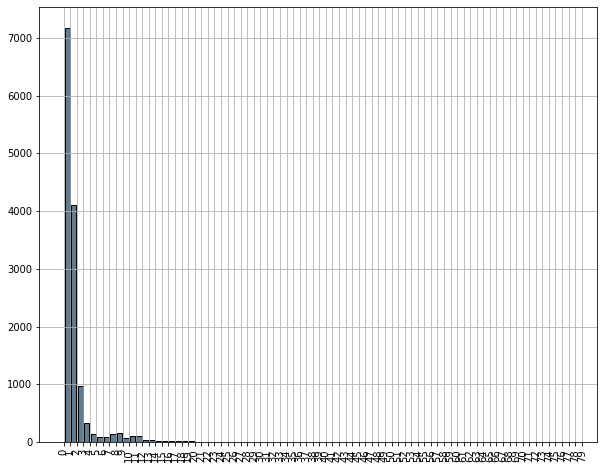

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import math
df_durations = pd.Series(durations)
w = 1
n = math.ceil((df_durations.max() - df_durations.min())/w)
plt.figure(figsize=(10,8))
df_durations.hist(grid=True, bins=n, rwidth=0.8,
                   color='#607c8e', histtype='bar', ec='black')
plt.xticks(np.arange(0,80,1), rotation=90);

The maximum duration is 77 seconds and the minimum is 0.078 seconds. the .value_counts will count just the numbers that are exaclty the same, we used .value_coutns for the list of strings to count how many times each string is present in the list. For the histogram it doesn't make sense to use .value_count()

Now we now, that most of the durations are lower than 22 seconds, so if we want we can zoom in and plot just the bins until 20 seconds but we must have in mind that there are audio files with the duration bigger than 20 seconds. Can you find out how many audio files have the duration higher than 20 seconds?

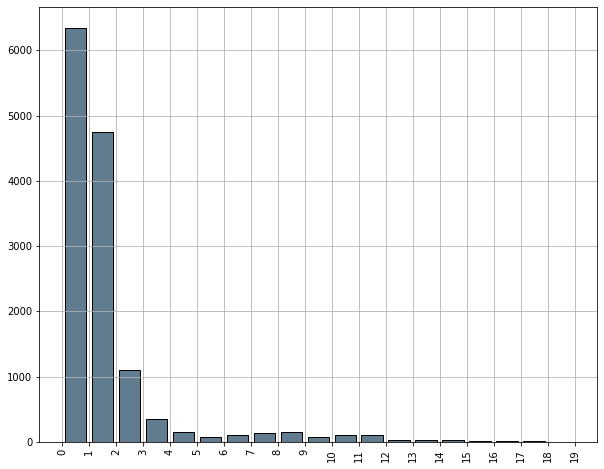

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import math
df_durations = pd.Series(durations)
w = 1
n = math.ceil((df_durations.max() - df_durations.min())/w)
plt.figure(figsize=(10,8))
df_durations.hist(grid=True, bins=np.arange(0,20,1), rwidth=0.8,
                   color='#607c8e', histtype='bar', ec='black')
plt.xticks(np.arange(0,20,1), rotation=90);

In [ ]:
We see that the great majority of audio files has a duration of less than 1 second.

In [37]:
df_durations.le(1).value_counts()
# We see that 7339 audio files have the duration smaller than 1 second, and 6342 have duration higher than 6342

False    7339
True     6342
dtype: int64

In [38]:
(df_durations >= 20)

0        False
1        False
2        False
3        False
4        False
         ...  
13676    False
13677    False
13678    False
13679    False
13680    False
Length: 13681, dtype: bool

In [39]:
(df_durations >= 20).value_counts()
# here we see that only 60 audio files have the duration higher than 20 seconds.

False    13621
True        60
dtype: int64

In [40]:
df_durations[df_durations >= 20]
# There are many ways to do the same kind of thing in Python, here are the files that have the duration higher than 20 seconds.

21       32.653061
567      77.609796
653      61.257143
671      33.123265
688      32.339592
860      50.677551
1045     62.302041
1278     31.399184
2148     40.411429
2281     43.937959
2410     41.456327
2750     27.141224
2949     28.499592
3267     32.417959
3638     70.661224
3823     34.037551
5999     54.308571
6003     46.680816
6013     26.618776
6017     43.937959
6188     52.819592
6296     46.210612
7153     29.544490
7814     26.618776
9342     23.144490
9395     24.685714
9641     20.897959
9650     26.932245
9751     20.297143
9757     66.925714
9776     24.137143
9831     21.080816
9847     52.349388
9854     53.185306
9884     22.935510
9898     46.576327
10053    21.942857
10062    22.961633
10106    57.939592
10123    50.599184
10135    28.813061
10258    23.327347
10261    22.360816
10339    20.453878
10380    22.700408
10500    20.506122
11379    22.543673
11505    27.715918
11604    31.399184
11771    26.044082
12144    31.216327
12715    20.088163
13051    41.